# OpenSAFELY COVID Vaccine coverage report: Booster / third doses 

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is an extension of our [regular weekly report](https://reports.opensafely.org/reports/vaccine-coverage/) on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of January 13th) in our preprint paper available [here](https://www.medrxiv.org/content/10.1101/2021.01.25.21250356v2).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).

## Booster/Third doses

This report is intended to highlight any differences between subgroups of priority cohorts in receiving "booster" doses (or third primary doses where eligible), at least 6 months (27 weeks) after their second dose.

In [2]:
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format='png'

from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)
import sys
sys.path.append('../lib/')
from create_report import find_and_sort_filenames
from second_third_doses import *

backend = os.getenv("OPENSAFELY_BACKEND", "expectations")
suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Third dose vaccinations included up to **{latest_date_fmt}** inclusive"))
    
with open(os.path.join("..", "interim-outputs","text", "latest_date_of_second_dose_for_due_third_doses.txt"), 'r') as file:
    latest_date_27w_fmt = file.read()

additional_stats = pd.read_csv(os.path.join("..", "interim-outputs", "text", "additional_stats_third_dose.txt")).set_index("Unnamed: 0")

    
display(Markdown(
    f"### Only persons who had their second dose at least 27 weeks ago (**{latest_date_27w_fmt}**) are included in the 'due' group."))

display(Markdown(f"##### \n"
                 f"### Vaccine types\n"
                 f"**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day."))

for x in additional_stats.index[0:3]:
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))


### Report last updated **06 Dec 2021**

### Third dose vaccinations included up to **03 Dec 2021** inclusive

### Only persons who had their second dose at least 27 weeks ago (**28 May 2021**) are included in the 'due' group.

##### 
### Vaccine types
**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day.

Oxford-AZ vaccines (% of all third doses): **0.1%** (7)


Pfizer vaccines (% of all third doses): **0.1%** (7)


Moderna vaccines (% of all third doses): **0.1%** (7)


##  
## Contents

**Cumulative third dose vaccination figures among:**
- [**80+** population](#Cumulative-second-dose-vaccination-figures-among-80+-population)
- [**70-79** population](#Cumulative-second-dose-vaccination-figures-among-70-79-population)
- [**Care home** population](#Cumulative-second-dose-vaccination-figures-among-care-home-population)
- <a href="#Cumulative-second-dose-vaccination-figures-among-shielding-(aged-16-69)-population"><strong>Shielding (aged 16-69)</strong> population</a>
- [**65-69** population](#Cumulative-second-dose-vaccination-figures-among-65-69-population)
- <a href="#Cumulative-second-dose-vaccination-figures-among-Learning-Disabilities-(aged-16-64)-population"><strong>LD (aged 16-64)</strong> population</a>
- [**60-64** population](#Cumulative-second-dose-vaccination-figures-among-60-64-population)
- [**55-59** population](#Cumulative-second-dose-vaccination-figures-among-54-59-population)
- [**50-54** population](#Cumulative-second-dose-vaccination-figures-among-50-54-population)

The above links will become functional as each of the stated populations are included in the report. 
- [**All groups (Summary**](#Summary))





In [2]:
with open('../lib/group_definitions.txt') as f:
    group_defs = f.read()
    display(Markdown(group_defs))

### Group definitions
- As of 29 Nov 2021, patient age is calculated at 31 Aug 2021 (previously 31 March 2021), in line with [national reporting](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1036047/Vaccine_surveillance_report_-_week_47.pdf). 
- The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).
- The **shielding** group is defined based on patients (aged 16-69) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).            
- The **LD** (learning disability) group is defined based on patients (aged 16-64) having one of [these](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/) codes and excludes people who are shielding.
- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding is only counted in the shielding group, not in the 65-69 group.
- The **housebound** group is defined based on [this](https://codelists.opensafely.org/codelist/opensafely/housebound/5bc77310/)
codelist and excludes people who were later recorded as [not housebound](https://codelists.opensafely.org/codelist/opensafely/no-longer-housebound/29a88ca6/) or in a [care home](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).


/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:81: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Third Doses due at 03 Dec (n)  \
Category                                  Group                                                               
overall                                   overall                                                       728   
Sex                                       F                                                             364   
                                          M                                                             371   
Age band                                  0-15                                                           42   
                                          16-17                                                          49   
                                          18-29                                                          42   
                                          30-34                                                          42   
                                          35-39                                                          56   
                                          40-44                                                          42   
                                          45-49                                                          42   
                                          50-54                                                          42   
                                          55-59                                                          42   
                                          60-64                                                          42   
                                          65-69                                                          56   
                                          70-74                                                          49   
                                          75-79                                                          49   
                                          80-84                                                          49   
                                          85-89                                                          49   
Ethnicity (broad categories)              Black                                                         119   
                                          Mixed                                                         126   
                                          Other                                                         140   
                                          South Asian                                                   112   
                                          Unknown                                                        98   
                                          White                                                         133   
ethnicity 16 groups                        Bangladeshi or British Bangladeshi                            35   
                                           Caribbean                                                     35   
                                           Chinese                                                       35   
                                           Other                                                         42   
                                           Other Asian                                                   42   
                                          British or Mixed British                                       42   
                                          Indian or British Indian                                       35   
                                          Irish                                                          42   
                                          Other Black                                                    49   
                                          Other White                                                    49   
                                          Other mixed                             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Third Doses Overdue Among 80+ Population

Third doses which have not been given at least 27 weeks since the second dose

Error bars indicate possible error caused by rounding

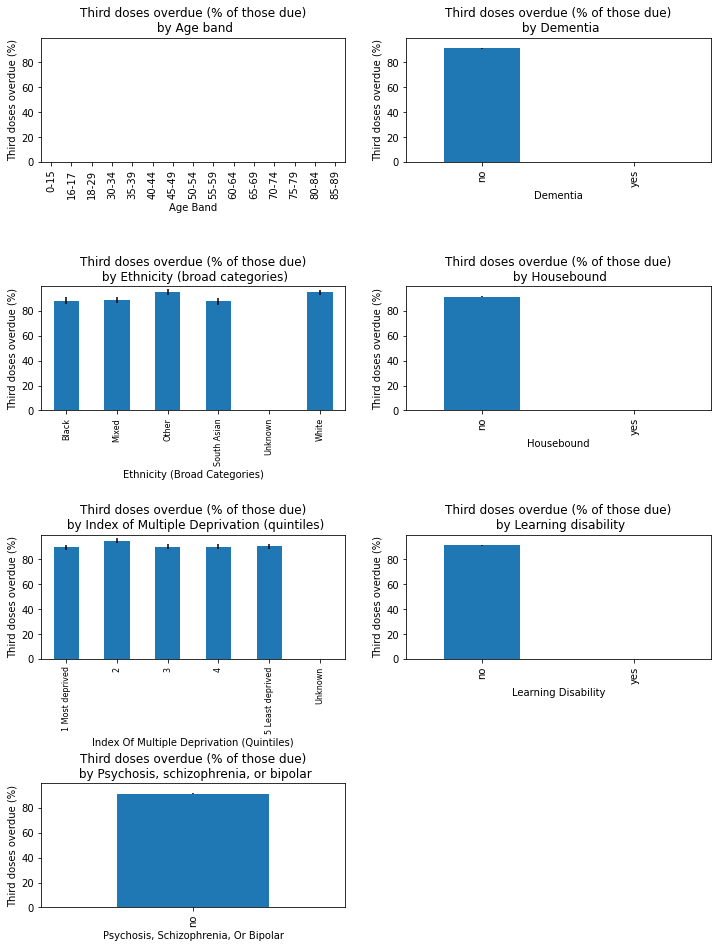

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:81: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Third Doses due at 03 Dec (n)  \
Category                                  Group                                                               
overall                                   overall                                                     1,253   
Sex                                       F                                                             665   
                                          M                                                             588   
Age band                                  0                                                              14   
                                          0-15                                                           70   
                                          16-17                                                          77   
                                          18-29                                                          91   
                                          30-34                                                          77   
                                          35-39                                                          98   
                                          40-44                                                          84   
                                          45-49                                                          70   
                                          50-54                                                          98   
                                          55-59                                                          77   
                                          60-64                                                          77   
                                          65-69                                                          77   
                                          70-74                                                          84   
                                          75-79                                                          77   
                                          80-84                                                          91   
                                          85-89                                                          91   
                                          90+                                                            14   
Ethnicity (broad categories)              Black                                                         196   
                                          Mixed                                                         217   
                                          Other                                                         224   
                                          South Asian                                                   175   
                                          Unknown                                                       231   
                                          White                                                         217   
ethnicity 16 groups                        African                                                       63   
                                           Bangladeshi or British Bangladeshi                            63   
                                           Caribbean                                                     63   
                                           Chinese                                                       63   
                                           Other                                                         70   
                                           Other Asian                                                   70   
                                          British or Mixed British                                       56   
                                          Indian or British Indian                                       70   
                                          Irish                                   

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Third Doses Overdue Among 70-79 Population

Third doses which have not been given at least 27 weeks since the second dose

Error bars indicate possible error caused by rounding

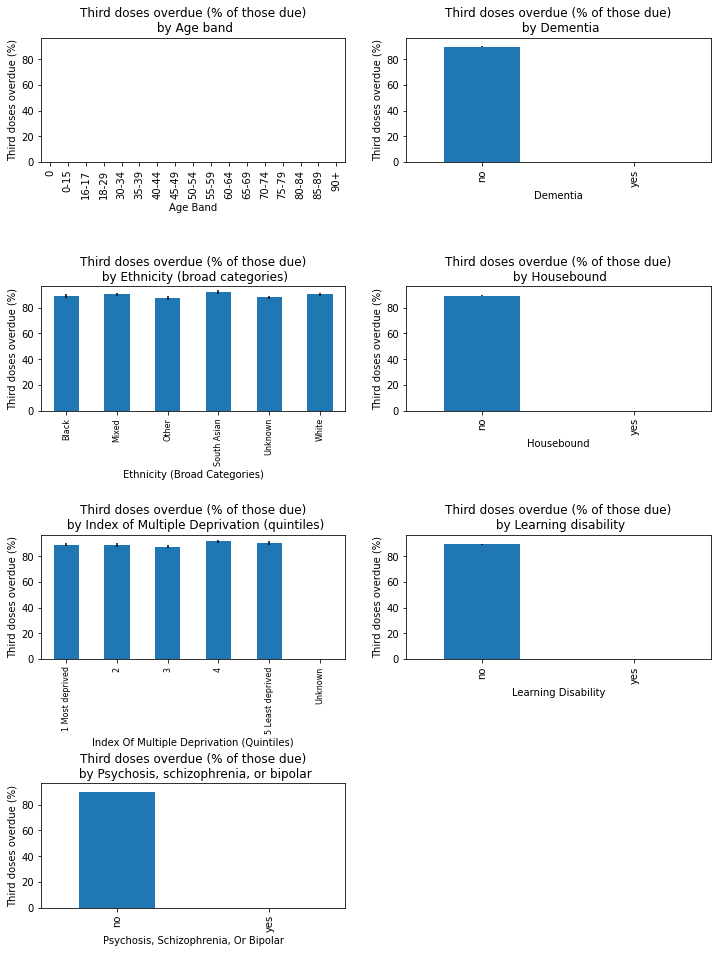

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:81: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among care home population 
 Please refer to footnotes below table for information.

Third Doses due at 03 Dec (n)  \
Category                     Group                                       
overall                      overall                               469   
Sex                          F                                     245   
                             M                                     224   
Age band                     0-15                                   35   
                             16-17                                  28   
                             18-29                                  28   
                             35-39                                  21   
                             40-44                                  28   
                             45-49                                  35   
                             50-54                                  42   
                             55-59                                  35   
                             60-64                                  28   
                             65-69                                  28   
                             70-74                                  28   
                             75-79                                  35   
                             80-84                                  28   
                             85-89                                  28   
                             90+                                     0   
Ethnicity (broad categories) Black                                  84   
                             Mixed                                  77   
                             Other                                  98   
                             South Asian                            70   
                             Unknown                                77   
                             White                                  77   
Dementia                     no                                    469   
                             yes                                     0   

                                         Third doses overdue (n)  \
Category                     Group                                 
overall                      overall                         420   
Sex                          F                               210   
                             M                               203   
Age band                     0-15                             35   
                             16-17                            28   
                             18-29                            28   
                             35-39                            21   
                             40-44                            28   
                             45-49                            35   
                             50-54                            35   
                             55-59                            35   
                             60-64                            28   
                             65-69                            28   
                             70-74                            28   
                             75-79                            35   
                             80-84                            21   
                             85-89                            28   
                             90+                               0   
Ethnicity (broad categories) Black                            77   
                             Mixed                            77   
                             Other                            84   
                             South Asian                      70   
                             Unknown                          70   
                             White                            70   
Dementia                     no                              420   
                             yes                               0   

                                         Third doses given (n) 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Third Doses Overdue Among Care Home Population

Third doses which have not been given at least 27 weeks since the second dose

Error bars indicate possible error caused by rounding

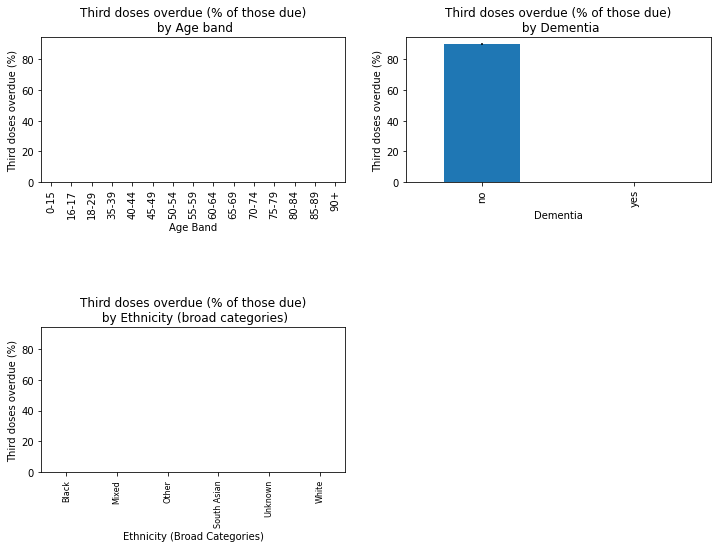

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:81: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Third Doses due at 03 Dec (n)  \
Category                                  Group                                            
overall                                   overall                                    147   
newly shielded since feb 15               no                                         147   
Sex                                       F                                           84   
                                          M                                           63   
Age band                                  16-29                                       21   
                                          30-39                                       14   
                                          40-49                                       14   
                                          50-59                                       14   
                                          60-69                                       14   
                                          70-79                                       42   
                                          80+                                         21   
Ethnicity (broad categories)              Black                                       21   
                                          Mixed                                       28   
                                          Other                                       21   
                                          Unknown                                     21   
                                          White                                       28   
Index of Multiple Deprivation (quintiles) 1 Most deprived                             21   
                                          2                                           35   
                                          4                                           28   
                                          5 Least deprived                            21   
                                          Unknown                                      7   
Learning disability                       no                                         140   

                                                           Third doses overdue (n)  \
Category                                  Group                                      
overall                                   overall                              133   
newly shielded since feb 15               no                                   133   
Sex                                       F                                     77   
                                          M                                     63   
Age band                                  16-29                                 21   
                                          30-39                                 14   
                                          40-49                                 14   
                                          50-59                                 14   
                                          60-69                                 14   
                                          70-79                                 42   
                                          80+                                   21   
Ethnicity (broad categories)              Black                                 21   
                                          Mixed                                 28   
                                          Other                                 21   
                                          Unknown                               21   
                                          White                                 28   
Index of Multiple Deprivation (quintiles) 1 Most deprived                       21   
                                          2                                     35   
                                          4                                     28   
                                          5 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

## 
 ## Third Doses Overdue Among Shielding (Aged 16-69) Population

Third doses which have not been given at least 27 weeks since the second dose

Error bars indicate possible error caused by rounding

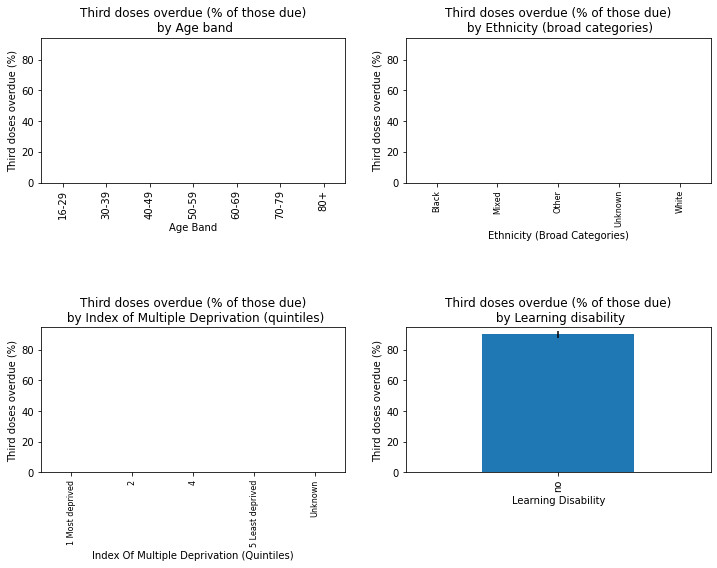

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:81: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Third Doses due at 03 Dec (n)  \
Category                                  Group                                                               
overall                                   overall                                                       756   
Sex                                       F                                                             399   
                                          M                                                             350   
Ethnicity (broad categories)              Black                                                         105   
                                          Mixed                                                         119   
                                          Other                                                         133   
                                          South Asian                                                   154   
                                          Unknown                                                       119   
                                          White                                                         126   
ethnicity 16 groups                        African                                                       49   
                                           Bangladeshi or British Bangladeshi                            28   
                                           Caribbean                                                     35   
                                           Chinese                                                       35   
                                           Other Asian                                                   49   
                                          Indian or British Indian                                       42   
                                          Irish                                                          35   
                                          Other Black                                                    28   
                                          Other White                                                    42   
                                          Other mixed                                                    42   
                                          Pakistani or British Pakistani                                 42   
                                          Unknown                                                       119   
                                          White + Asian                                                  42   
                                          White + Black African                                          49   
                                          White + Black Caribbean                                        35   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                               147   
                                          2                                                             140   
                                          3                                                             126   
                                          4                                                             147   
                                          5 Least deprived                                              154   
                                          Unknown                                                        42   
BMI                                       30+                                                           238   
                                          under 30                                                      511   
Housebound                                no                                                            742   
                                          yes                                                            14   
Chronic cardiac disease                   no                                      

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Third Doses Overdue Among 65-69 Population

Third doses which have not been given at least 27 weeks since the second dose

Error bars indicate possible error caused by rounding

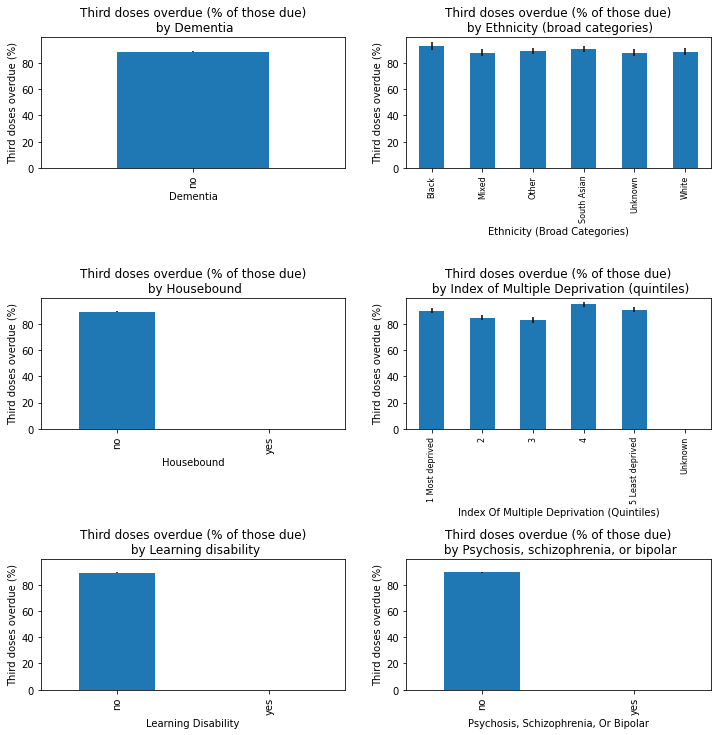

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:81: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among Learning Disabilities (aged 16-64) population 
 Please refer to footnotes below table for information.

Third Doses due at 03 Dec (n)  \
Category                     Group                                       
overall                      overall                               280   
Sex                          F                                     140   
                             M                                     140   
Age band                     16-17                                  14   
                             18-29                                  14   
                             30-34                                  21   
                             35-39                                  21   
                             40-44                                  14   
                             45-49                                  21   
                             50-54                                  14   
                             55-59                                  28   
                             60-64                                  14   
                             65-69                                  28   
                             70-74                                  14   
                             75-79                                  21   
                             80-84                                  14   
                             85-89                                  14   
                             90+                                     0   
Ethnicity (broad categories) Black                                  56   
                             Mixed                                  49   
                             Other                                  49   
                             South Asian                            49   
                             Unknown                                35   
                             White                                  49   

                                         Third doses overdue (n)  \
Category                     Group                                 
overall                      overall                         252   
Sex                          F                               126   
                             M                               119   
Age band                     16-17                            14   
                             18-29                            14   
                             30-34                            21   
                             35-39                            21   
                             40-44                            14   
                             45-49                            21   
                             50-54                            14   
                             55-59                            28   
                             60-64                            14   
                             65-69                            28   
                             70-74                            14   
                             75-79                            21   
                             80-84                            14   
                             85-89                            14   
                             90+                               0   
Ethnicity (broad categories) Black                            56   
                             Mixed                            49   
                             Other                            42   
                             South Asian                      49   
                             Unknown                          35   
                             White                            49   

                                         Third doses given (n)  \
Category                     Group                               
overall                      overall                        28   
Sex                          F                              14   
                             M                              21   
Age band         

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

## 
 ## Third Doses Overdue Among People With Learning Disabilities (Aged 16-64)

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:176: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  axes[n].set_ylim([0, min(max_ylim, ymax*1.05)])
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:176: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  axes[n].set_ylim([0, min(max_ylim, ymax*1.05)])


Third doses which have not been given at least 27 weeks since the second dose

Error bars indicate possible error caused by rounding

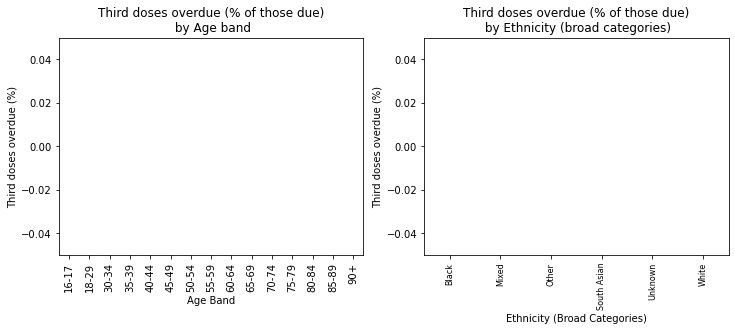

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:81: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Third Doses due at 03 Dec (n)  \
Category                                  Group                                                               
overall                                   overall                                                       910   
Sex                                       F                                                             469   
                                          M                                                             441   
Ethnicity (broad categories)              Black                                                         140   
                                          Mixed                                                         175   
                                          Other                                                         147   
                                          South Asian                                                   140   
                                          Unknown                                                       140   
                                          White                                                         161   
ethnicity 16 groups                        African                                                       42   
                                           Bangladeshi or British Bangladeshi                            49   
                                           Caribbean                                                     49   
                                           Chinese                                                       35   
                                           Other                                                         49   
                                           Other Asian                                                   49   
                                          British or Mixed British                                       49   
                                          Indian or British Indian                                       49   
                                          Irish                                                          35   
                                          Other Black                                                    49   
                                          Other White                                                    56   
                                          Other mixed                                                    49   
                                          Pakistani or British Pakistani                                 42   
                                          Unknown                                                       140   
                                          White + Asian                                                  49   
                                          White + Black African                                          49   
                                          White + Black Caribbean                                        56   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                               161   
                                          2                                                             168   
                                          3                                                             189   
                                          4                                                             175   
                                          5 Least deprived                                              168   
                                          Unknown                                                        49   
BMI                                       30+                                                           259   
                                          under 30                                                      644   
Chronic cardiac disease                   no                                      

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Third Doses Overdue Among 60-64 Population

Third doses which have not been given at least 27 weeks since the second dose

Error bars indicate possible error caused by rounding

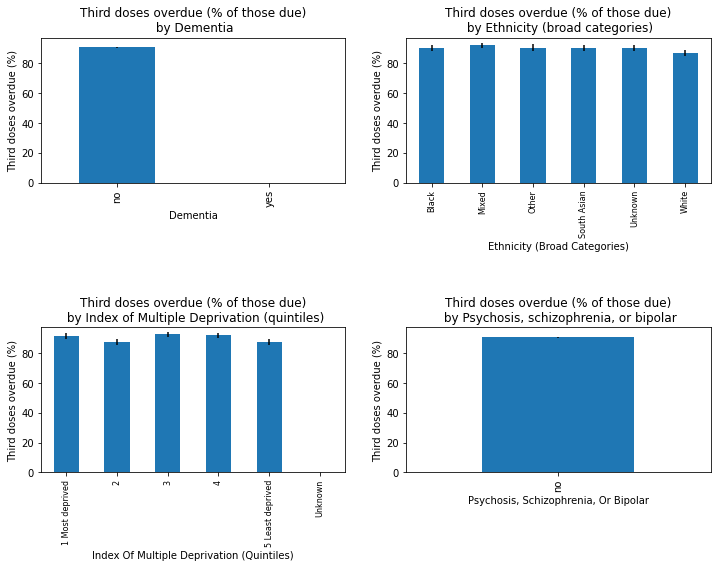

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:81: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Third Doses due at 03 Dec (n)  \
Category                                  Group                                                               
overall                                   overall                                                     1,064   
Sex                                       F                                                             553   
                                          M                                                             511   
Ethnicity (broad categories)              Black                                                         217   
                                          Mixed                                                         182   
                                          Other                                                         161   
                                          South Asian                                                   182   
                                          Unknown                                                       154   
                                          White                                                         168   
ethnicity 16 groups                        African                                                       56   
                                           Bangladeshi or British Bangladeshi                            49   
                                           Caribbean                                                     63   
                                           Chinese                                                       49   
                                           Other                                                         63   
                                           Other Asian                                                   70   
                                          British or Mixed British                                       56   
                                          Indian or British Indian                                       49   
                                          Irish                                                          63   
                                          Other Black                                                    56   
                                          Other White                                                    56   
                                          Other mixed                                                    42   
                                          Pakistani or British Pakistani                                 49   
                                          Unknown                                                       161   
                                          White + Asian                                                  63   
                                          White + Black African                                          63   
                                          White + Black Caribbean                                        56   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                               196   
                                          2                                                             210   
                                          3                                                             182   
                                          4                                                             217   
                                          5 Least deprived                                              196   
                                          Unknown                                                        63   
BMI                                       30+                                                           336   
                                          under 30                                                      728   
Chronic cardiac disease                   no                                      

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Third Doses Overdue Among 55-59 Population

Third doses which have not been given at least 27 weeks since the second dose

Error bars indicate possible error caused by rounding

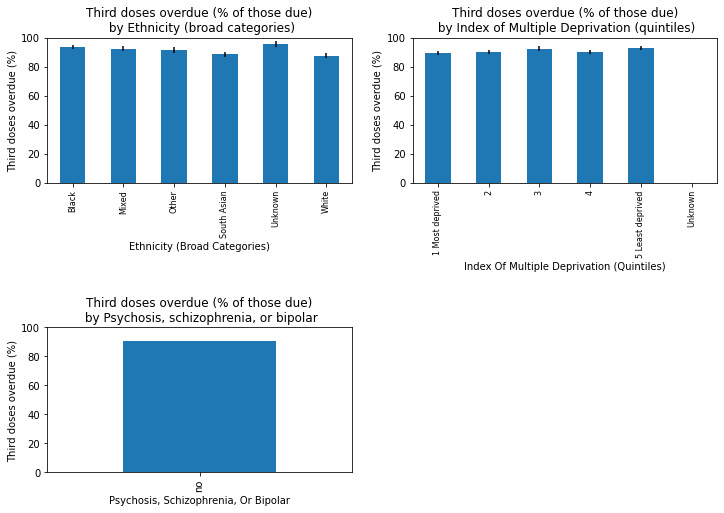

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:81: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 50-54 population 
 Please refer to footnotes below table for information.

Third Doses due at 03 Dec (n)  \
Category                                  Group                                                               
overall                                   overall                                                     1,239   
Sex                                       F                                                             623   
                                          M                                                             616   
Ethnicity (broad categories)              Black                                                         210   
                                          Mixed                                                         203   
                                          Other                                                         203   
                                          South Asian                                                   224   
                                          Unknown                                                       189   
                                          White                                                         217   
ethnicity 16 groups                        African                                                       63   
                                           Bangladeshi or British Bangladeshi                            77   
                                           Caribbean                                                     56   
                                           Chinese                                                       70   
                                           Other                                                         70   
                                           Other Asian                                                   49   
                                          British or Mixed British                                       63   
                                          Indian or British Indian                                       70   
                                          Irish                                                          63   
                                          Other Black                                                    70   
                                          Other White                                                    56   
                                          Other mixed                                                    77   
                                          Pakistani or British Pakistani                                 70   
                                          Unknown                                                       196   
                                          White + Asian                                                  70   
                                          White + Black African                                          56   
                                          White + Black Caribbean                                        70   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                               224   
                                          2                                                             210   
                                          3                                                             259   
                                          4                                                             245   
                                          5 Least deprived                                              231   
                                          Unknown                                                        70   
BMI                                       30+                                                           392   
                                          under 30                                                      847   
Chronic cardiac disease                   no                                      

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Third Doses Overdue Among 50-54 Population

Third doses which have not been given at least 27 weeks since the second dose

Error bars indicate possible error caused by rounding

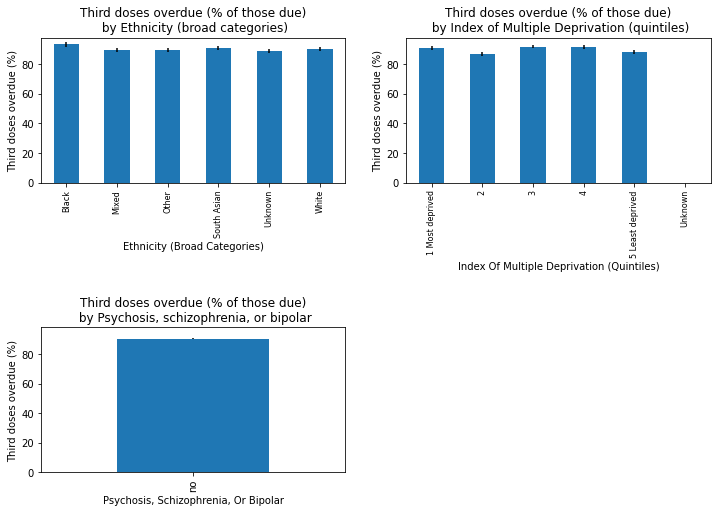

## 
 # Summary

,Third Doses due at 03 Dec (n),Third doses overdue (n),Third doses given (n),Third doses given (% of due),Total population
80+,728,665,63,8.7,"2,128"
70-79,"1,253","1,120",133,10.6,"3,591"
care home,469,420,49,10.4,"1,344"
shielding (aged 16-69),147,133,14,9.5,434
65-69,756,672,84,11.1,"2,072"
LD (aged 16-64),280,252,28,10.0,819
60-64,910,826,84,9.2,"2,611"
55-59,"1,064",966,98,9.2,"3,115"
50-54,"1,239","1,120",119,9.6,"3,367"


In [3]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                                    pre_string="among ", tail_string=" population.csv",
                                    population_subset="Cumulative second dose 27w ago",
                                    files_to_exclude=["Cumulative second dose 27w ago vaccination figures among 16-17 population.csv"],
                                    )
    
# get 3rd dose figures for each group
tablelist_2nd = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                                        pre_string="among ", tail_string=" population.csv",
                                        population_subset="Cumulative third dose vaccination",
                                        files_to_exclude=["Cumulative third dose vaccination figures among 16-17 population.csv"],
                                        )


second_third_doses(tablelist, tablelist_2nd, cohorts=["80+","70-79","care home", "shielding (aged 16-69)", "65-69", "60-64", "55-59", "50-54", "LD (aged 16-64)"], dose_type="Third", time_period="27 weeks",
                   max_ylim=100,
                   latest_date_fmt=latest_date_fmt,
                   latest_date_fmt_2=latest_date_27w_fmt, 
                   backend=backend, suffix = "_tpp")
